In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [3]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

Making dataframes:

In [4]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

Contents of Dataframes:

In [5]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,438098,0,0,-1,1,0,3,0.0,...,144,86,642,292,648,295,608,269,0.0,0.0
1,100.0,100.0,205651,0,0,-2,2,0,4,2.0,...,37,16,329,36,414,44,203,37,0.0,0.0
2,NaN,NaN,226597,1,-1,2,-2,1,2,7.7,...,75,3,11,1,13,1,12,4,1.0,0.5
3,NaN,NaN,219847,0,0,2,-2,1,4,6.0,...,12,4,30,9,24,6,18,5,1.0,0.5
4,0.0,0.0,463748,0,0,0,0,0,1,0.0,...,630,65,422,48,461,53,527,65,0.0,0.0


In [6]:
elements_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_select,squad_max_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,None,None,1,1,True,[12],70
1,2,Defenders,DEF,Defender,DEF,5,None,None,3,5,False,[],218
2,3,Midfielders,MID,Midfielder,MID,5,None,None,2,5,False,[],303
3,4,Forwards,FWD,Forward,FWD,3,None,None,1,3,False,[],73


In [7]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'region', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected

Making a copy of the Dataframe with only the important columns

In [8]:
slim_elements_df = elements_df[['web_name','team','element_type','selected_by_percent','now_cost','value_season','total_points', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 
       'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded']]

In [9]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,Fábio Vieira,1,3,0.0,54,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00
1,G.Jesus,1,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97
2,Gabriel,1,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75
3,Havertz,1,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75
4,Hein,1,1,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00


Map the position name from 'element_type_df' to 'slim_elements_df'

In [10]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [11]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position
0,Fábio Vieira,1,3,0.0,54,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Midfielder
1,G.Jesus,1,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward
2,Gabriel,1,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender
3,Havertz,1,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward
4,Hein,1,1,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Goalkeeper


Similarly add teams:

In [12]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [13]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position
0,Fábio Vieira,Arsenal,3,0.0,54,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Midfielder
1,G.Jesus,Arsenal,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender
3,Havertz,Arsenal,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward
4,Hein,Arsenal,1,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Goalkeeper


Create New Column called 'value' because value_season contains some strings:

$value = points/cost$

In [14]:
slim_elements_df['value'] = slim_elements_df['total_points']/slim_elements_df['now_cost']

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\1005271124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df['total_points']/slim_elements_df['now_cost']


In [15]:
slim_elements_df['value']

0      0.000000
1      0.029412
2      0.596774
3      0.390244
4      0.000000
         ...   
659    0.093023
660    0.000000
661    0.100000
662    0.018182
663    0.000000
Name: value, Length: 664, dtype: float64

In [16]:
slim_elements_df[slim_elements_df['team']=='Arsenal']

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
0,Fábio Vieira,Arsenal,3,0.0,54,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Midfielder,0.000000
1,G.Jesus,Arsenal,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward,0.029412
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774
3,Havertz,Arsenal,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward,0.390244
4,Hein,Arsenal,1,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Goalkeeper,0.000000
5,J.Timber,Arsenal,2,1.8,55,3.5,19,0,1,2,4,0.18,0.17,0.35,5.51,Defender,0.345455
6,Jorginho,Arsenal,3,0.3,49,0.4,2,0,0,1,0,0.00,0.00,0.00,0.74,Midfielder,0.040816
7,Kiwior,Arsenal,2,0.1,48,0.2,1,0,0,0,1,0.00,0.00,0.00,0.99,Defender,0.020833
8,Martinelli,Arsenal,3,2.7,69,4.1,28,1,2,3,3,0.75,1.35,2.10,4.60,Midfielder,0.405797
9,Nwaneri,Arsenal,3,0.3,45,0.4,2,0,0,0,0,0.02,0.16,0.18,0.09,Midfielder,0.044444


In [17]:
max(slim_elements_df['value_season'])

'7.1'

In [18]:
#slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

In [19]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
0,Fábio Vieira,Arsenal,3,0.0,54,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Midfielder,0.000000
1,G.Jesus,Arsenal,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward,0.029412
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774
3,Havertz,Arsenal,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward,0.390244
4,Hein,Arsenal,1,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Goalkeeper,0.000000


In [20]:
max(slim_elements_df['value'])

0.7090909090909091

Sort wrt 'value'

In [21]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
262,McNeil,Everton,3,3.4,55,7.1,39,3,2,0,15,0.51,2.97,3.47,9.70,Midfielder,0.709091
208,Sánchez,Chelsea,1,11.0,47,6.8,32,0,0,2,7,0.00,0.00,0.00,6.84,Goalkeeper,0.680851
388,Luis Díaz,Liverpool,3,36.2,80,6.6,53,5,1,5,1,2.75,0.73,3.48,2.54,Midfielder,0.662500
387,Konaté,Liverpool,2,8.5,51,6.1,31,1,1,3,2,0.41,0.08,0.49,3.77,Defender,0.607843
11,Raya,Arsenal,1,30.5,56,6.1,34,0,0,3,5,0.00,0.01,0.01,6.75,Goalkeeper,0.607143
448,Onana,Man Utd,1,5.9,50,6.0,30,0,0,3,5,0.00,0.00,0.00,6.39,Goalkeeper,0.600000
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774
112,Mbeumo,Brentford,3,20.7,73,5.9,43,5,0,0,10,1.99,1.69,3.68,11.81,Midfielder,0.589041
205,Palmer,Chelsea,3,41.3,106,5.8,61,6,4,2,7,3.26,1.51,4.77,6.44,Midfielder,0.575472
278,Smith Rowe,Fulham,3,30.3,58,5.7,33,2,1,3,3,1.53,0.77,2.30,4.65,Midfielder,0.568966


Pivot table on column position to see value-by-position

In [22]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()
pivot

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\1374719629.py:1: FutureWarning: The provided callable <function mean at 0x000002B6B18A54E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()


,position,value
0,Defender,0.124231
1,Forward,0.124337
2,Goalkeeper,0.116257
3,Midfielder,0.126100


In [23]:
pivot.sort_values('value', ascending=False)

,position,value
3,Midfielder,0.126100
1,Forward,0.124337
0,Defender,0.124231
2,Goalkeeper,0.116257


Goalkeepers are the lowest value, even though we see 4 out of the top 10 are goalkeepers. This may be because many goalkeepers played zero minutes. We can remove such rows from our dataframe

In [24]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [25]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()
pivot.sort_values('value', ascending=False)

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\494801085.py:1: FutureWarning: The provided callable <function mean at 0x000002B6B18A54E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()


,position,value
2,Goalkeeper,0.290641
0,Defender,0.205169
1,Forward,0.201701
3,Midfielder,0.180228


We see that the goalkeepers provide the most value when we have removed the 'outliers'. However, we need to be clear here beacuse the number of goalkeepers that play are also less as compared to the outfield positions

Lets see which Team provided the most value:

In [26]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

C:\Users\Naimish\AppData\Local\Temp\ipykernel_22280\4135556487.py:1: FutureWarning: The provided callable <function mean at 0x000002B6B18A54E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()


,team,value
8,Fulham,0.268232
0,Arsenal,0.248553
11,Liverpool,0.248369
5,Chelsea,0.241837
14,Newcastle,0.227149
4,Brighton,0.225330
13,Man Utd,0.222090
15,Nott'm Forest,0.220635
12,Man City,0.204427
6,Crystal Palace,0.202861


In [27]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<Axes: >

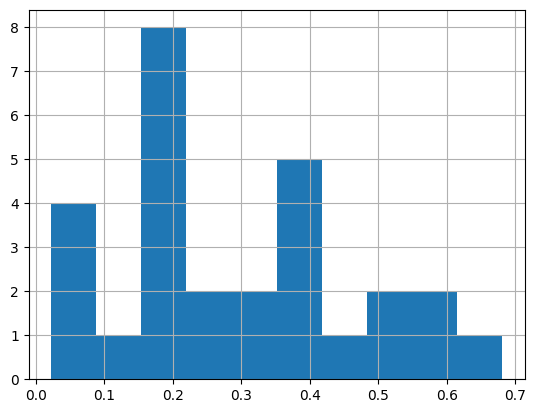

In [28]:
# !pip install matplotlib
goal_df.value.hist()

In [29]:
goal_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
208,Sánchez,Chelsea,1,11.0,47,6.8,32,0,0,2,7,0.00,0.00,0.00,6.84,Goalkeeper,0.680851
11,Raya,Arsenal,1,30.5,56,6.1,34,0,0,3,5,0.00,0.01,0.01,6.75,Goalkeeper,0.607143
448,Onana,Man Utd,1,5.9,50,6.0,30,0,0,3,5,0.00,0.00,0.00,6.39,Goalkeeper,0.600000
514,Sels,Nott'm Forest,1,2.8,45,5.1,23,0,0,2,5,0.00,0.02,0.02,5.42,Goalkeeper,0.511111
481,Pope,Newcastle,1,7.9,50,5.0,25,0,0,1,7,0.00,0.00,0.00,9.45,Goalkeeper,0.500000
372,A.Becker,Liverpool,1,9.5,55,4.5,25,0,0,3,2,0.00,0.00,0.00,3.18,Goalkeeper,0.454545
226,Henderson,Crystal Palace,1,11.8,45,4.0,18,0,0,1,9,0.04,0.00,0.04,9.09,Goalkeeper,0.400000
409,Ederson M.,Man City,1,8.4,55,3.8,21,0,1,1,6,0.00,0.01,0.01,5.21,Goalkeeper,0.381818
104,Flekken,Brentford,1,12.0,45,3.8,17,0,0,0,10,0.00,0.02,0.02,11.81,Goalkeeper,0.377778
332,Muric,Ipswich,1,0.9,44,3.6,16,0,0,1,6,0.00,0.00,0.00,8.44,Goalkeeper,0.363636


<Axes: >

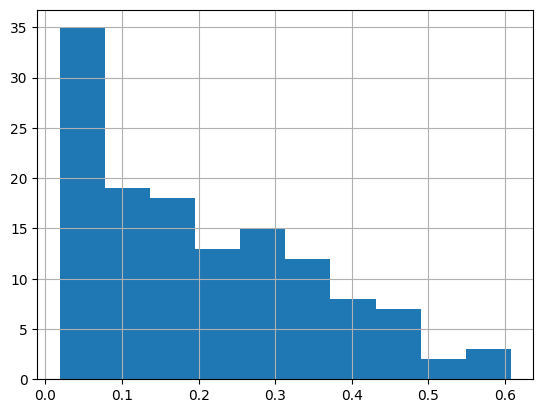

In [30]:
def_df.value.hist()

In [31]:
def_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
387,Konaté,Liverpool,2,8.5,51,6.1,31,1,1,3,2,0.41,0.08,0.49,3.77,Defender,0.607843
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774
434,Dalot,Man Utd,2,9.9,51,5.8,29,0,1,3,5,0.02,0.80,0.82,6.39,Defender,0.568627
455,Mazraoui,Man Utd,2,16.7,46,5.4,25,0,1,3,5,0.20,0.46,0.66,6.33,Defender,0.543478
296,Robinson,Fulham,2,15.8,47,5.1,24,0,2,1,5,0.11,0.39,0.50,6.62,Defender,0.510638
493,Aina,Nott'm Forest,2,6.1,45,4.9,22,0,0,2,4,0.03,0.42,0.45,4.75,Defender,0.488889
399,Virgil,Liverpool,2,14.9,60,4.7,28,0,0,4,2,0.16,0.09,0.25,4.26,Defender,0.466667
373,Alexander-Arnold,Liverpool,2,32.6,71,4.6,33,0,1,4,2,0.28,2.33,2.61,3.69,Defender,0.464789
454,De Ligt,Man Utd,2,4.9,50,4.6,23,1,0,2,4,0.95,0.00,0.95,4.09,Defender,0.460000
396,Robertson,Liverpool,2,7.4,60,4.5,27,0,0,4,2,0.38,1.06,1.44,4.01,Defender,0.450000


<Axes: >

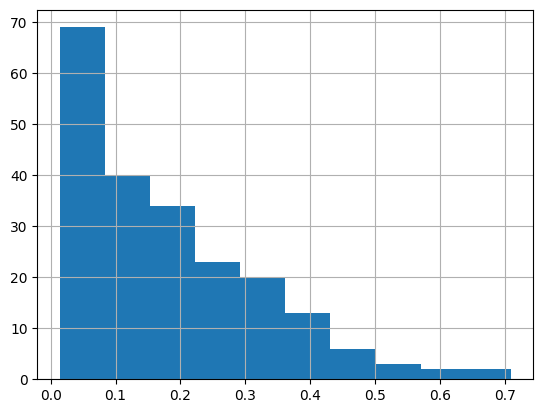

In [32]:
mid_df.value.hist()

In [33]:
mid_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
262,McNeil,Everton,3,3.4,55,7.1,39,3,2,0,15,0.51,2.97,3.47,9.70,Midfielder,0.709091
388,Luis Díaz,Liverpool,3,36.2,80,6.6,53,5,1,5,1,2.75,0.73,3.48,2.54,Midfielder,0.662500
112,Mbeumo,Brentford,3,20.7,73,5.9,43,5,0,0,10,1.99,1.69,3.68,11.81,Midfielder,0.589041
205,Palmer,Chelsea,3,41.3,106,5.8,61,6,4,2,7,3.26,1.51,4.77,6.44,Midfielder,0.575472
278,Smith Rowe,Fulham,3,30.3,58,5.7,33,2,1,3,3,1.53,0.77,2.30,4.65,Midfielder,0.568966
461,Barnes,Newcastle,3,3.8,65,5.4,35,3,1,0,5,1.27,0.68,1.95,5.83,Midfielder,0.538462
280,Adama,Fulham,3,3.9,51,5.1,26,1,2,2,4,1.16,1.43,2.59,5.00,Midfielder,0.509804
200,Madueke,Chelsea,3,10.3,66,5.0,33,3,1,2,5,1.55,0.16,1.71,5.48,Midfielder,0.500000
616,Souček,West Ham,3,2.6,50,5.0,25,2,1,1,6,1.67,0.47,2.14,6.60,Midfielder,0.500000
389,M.Salah,Liverpool,3,42.7,128,4.6,59,4,4,4,2,3.85,1.38,5.23,4.26,Midfielder,0.460938


<Axes: >

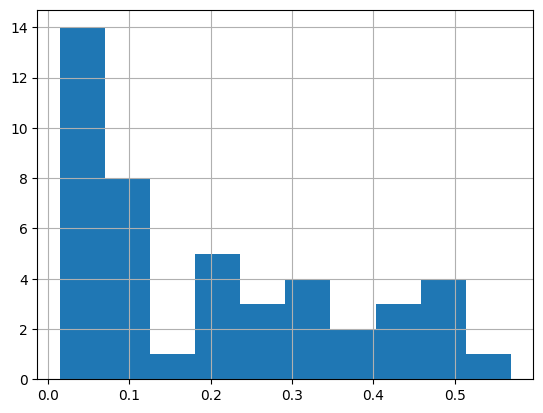

In [34]:
fwd_df.value.hist()

In [35]:
fwd_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
166,Welbeck,Brighton,4,19.7,58,5.7,33,3,1,2,8,2.33,0.27,2.60,8.92,Forward,0.568966
203,N.Jackson,Chelsea,4,15.8,78,5.1,40,4,3,2,6,4.02,0.20,4.22,6.01,Forward,0.512821
517,Wood,Nott'm Forest,4,11.1,62,5.0,31,3,0,3,4,2.34,0.15,2.49,4.67,Forward,0.500000
293,Raúl,Fulham,4,3.2,55,4.9,27,3,0,2,2,1.74,0.08,1.82,3.43,Forward,0.490909
123,Wissa,Brentford,4,2.7,60,4.7,28,3,1,0,6,2.43,0.27,2.70,5.38,Forward,0.466667
413,Haaland,Man City,4,73.0,153,4.2,65,10,0,1,6,6.14,0.28,6.42,5.21,Forward,0.424837
252,Calvert-Lewin,Everton,4,6.1,60,4.2,25,2,1,0,11,1.72,0.43,2.15,8.17,Forward,0.416667
42,Duran,Aston Villa,4,6.3,62,4.0,25,4,0,0,3,2.07,0.14,2.21,2.19,Forward,0.403226
3,Havertz,Arsenal,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward,0.390244
363,Vardy,Leicester,4,10.8,57,3.9,22,2,0,0,12,1.44,0.09,1.53,12.83,Forward,0.385965


Key to winning sometimes is finding those key differentials. So let us look at some of the less-selected, value players.

In [36]:
diff = slim_elements_df.loc[slim_elements_df.selected_by_percent < '5']
diff

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
1,G.Jesus,Arsenal,4,0.9,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward,0.029412
2,Gabriel,Arsenal,2,23.8,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774
3,Havertz,Arsenal,4,18.9,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward,0.390244
5,J.Timber,Arsenal,2,1.8,55,3.5,19,0,1,2,4,0.18,0.17,0.35,5.51,Defender,0.345455
6,Jorginho,Arsenal,3,0.3,49,0.4,2,0,0,1,0,0.00,0.00,0.00,0.74,Midfielder,0.040816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Sarabia,Wolves,3,0.1,52,0.4,2,0,0,0,1,0.10,0.02,0.12,0.32,Midfielder,0.038462
658,Strand Larsen,Wolves,4,1.0,55,3.5,19,1,1,1,13,0.88,0.42,1.30,7.14,Forward,0.345455
659,Toti,Wolves,2,0.2,43,0.9,4,0,1,0,11,0.00,0.25,0.25,6.48,Defender,0.093023
661,André,Wolves,3,0.0,50,1.0,5,0,0,0,6,0.06,0.03,0.09,5.27,Midfielder,0.100000


There seems to be a problem with the 'selected_by_percent' column. There are some string values included within it. Lets try and fix it.

In [37]:
print(slim_elements_df.dtypes)

web_name                       object
team                           object
element_type                    int64
selected_by_percent            object
now_cost                        int64
value_season                   object
total_points                    int64
goals_scored                    int64
assists                         int64
clean_sheets                    int64
goals_conceded                  int64
expected_goals                 object
expected_assists               object
expected_goal_involvements     object
expected_goals_conceded        object
position                       object
value                         float64
dtype: object


In [38]:
slim_elements_df['selected_by_percent'] = pd.to_numeric(slim_elements_df['selected_by_percent'],errors='coerce')

In [39]:
slim_elements_df['selected_by_percent'] = slim_elements_df['selected_by_percent'].astype(int)

In [40]:
print(slim_elements_df.dtypes)

web_name                       object
team                           object
element_type                    int64
selected_by_percent             int32
now_cost                        int64
value_season                   object
total_points                    int64
goals_scored                    int64
assists                         int64
clean_sheets                    int64
goals_conceded                  int64
expected_goals                 object
expected_assists               object
expected_goal_involvements     object
expected_goals_conceded        object
position                       object
value                         float64
dtype: object


Data-type for the column now is int as required.

In [41]:
diff = slim_elements_df.loc[slim_elements_df.selected_by_percent < 5]
diff.sort_values('value', ascending = False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
262,McNeil,Everton,3,3,55,7.1,39,3,2,0,15,0.51,2.97,3.47,9.70,Midfielder,0.709091
461,Barnes,Newcastle,3,3,65,5.4,35,3,1,0,5,1.27,0.68,1.95,5.83,Midfielder,0.538462
514,Sels,Nott'm Forest,1,2,45,5.1,23,0,0,2,5,0.00,0.02,0.02,5.42,Goalkeeper,0.511111
280,Adama,Fulham,3,3,51,5.1,26,1,2,2,4,1.16,1.43,2.59,5.00,Midfielder,0.509804
616,Souček,West Ham,3,2,50,5.0,25,2,1,1,6,1.67,0.47,2.14,6.60,Midfielder,0.500000
293,Raúl,Fulham,4,3,55,4.9,27,3,0,2,2,1.74,0.08,1.82,3.43,Forward,0.490909
123,Wissa,Brentford,4,2,60,4.7,28,3,1,0,6,2.43,0.27,2.70,5.38,Forward,0.466667
454,De Ligt,Man Utd,2,4,50,4.6,23,1,0,2,4,0.95,0.00,0.95,4.09,Defender,0.460000
288,Iwobi,Fulham,3,1,55,4.5,25,1,1,2,4,0.70,1.11,1.81,6.19,Midfielder,0.454545
163,Veltman,Brighton,2,3,45,4.4,20,0,0,2,4,0.05,0.49,0.54,4.89,Defender,0.444444


Let us do a different kind of analysis. 
Introducting xG

In [42]:
slim_elements_df['expected_goals'] = pd.to_numeric(slim_elements_df['expected_goals'],errors='coerce')

slim_elements_df['expected_goals'] = slim_elements_df['expected_goals'].astype(float)

In [43]:
slim_elements_df['Goals-xG'] = slim_elements_df['goals_scored']-slim_elements_df['expected_goals']

In [44]:
slim_elements_df

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG
1,G.Jesus,Arsenal,4,0,68,0.3,2,0,0,0,1,0.11,0.00,0.11,0.97,Forward,0.029412,-0.11
2,Gabriel,Arsenal,2,23,62,6.1,37,2,0,3,5,1.27,0.11,1.38,6.75,Defender,0.596774,0.73
3,Havertz,Arsenal,4,18,82,3.9,32,3,1,3,5,3.81,0.16,3.97,6.75,Forward,0.390244,-0.81
5,J.Timber,Arsenal,2,1,55,3.5,19,0,1,2,4,0.18,0.17,0.35,5.51,Defender,0.345455,-0.18
6,Jorginho,Arsenal,3,0,49,0.4,2,0,0,1,0,0.00,0.00,0.00,0.74,Midfielder,0.040816,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Sarabia,Wolves,3,0,52,0.4,2,0,0,0,1,0.10,0.02,0.12,0.32,Midfielder,0.038462,-0.10
658,Strand Larsen,Wolves,4,1,55,3.5,19,1,1,1,13,0.88,0.42,1.30,7.14,Forward,0.345455,0.12
659,Toti,Wolves,2,0,43,0.9,4,0,1,0,11,0.00,0.25,0.25,6.48,Defender,0.093023,0.00
661,André,Wolves,3,0,50,1.0,5,0,0,0,6,0.06,0.03,0.09,5.27,Midfielder,0.100000,-0.06


In [45]:
df_sorted = slim_elements_df.sort_values('Goals-xG', ascending=False)
df_sorted

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG
413,Haaland,Man City,4,73,153,4.2,65,10,0,1,6,6.14,0.28,6.42,5.21,Forward,0.424837,3.86
112,Mbeumo,Brentford,3,20,73,5.9,43,5,0,0,10,1.99,1.69,3.68,11.81,Midfielder,0.589041,3.01
205,Palmer,Chelsea,3,41,106,5.8,61,6,4,2,7,3.26,1.51,4.77,6.44,Midfielder,0.575472,2.74
262,McNeil,Everton,3,3,55,7.1,39,3,2,0,15,0.51,2.97,3.47,9.70,Midfielder,0.709091,2.49
388,Luis Díaz,Liverpool,3,36,80,6.6,53,5,1,5,1,2.75,0.73,3.48,2.54,Midfielder,0.662500,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Szoboszlai,Liverpool,3,2,65,3.2,21,0,2,4,2,1.19,0.91,2.10,3.71,Midfielder,0.323077,-1.19
292,Muniz,Fulham,4,3,59,2.0,12,0,1,1,3,1.19,0.03,1.22,3.18,Forward,0.203390,-1.19
431,B.Fernandes,Man Utd,3,9,82,1.8,15,0,1,3,4,1.86,1.32,3.18,5.80,Midfielder,0.182927,-1.86
98,Evanilson,Bournemouth,4,0,59,1.0,6,0,0,2,5,1.90,0.39,2.29,4.43,Forward,0.101695,-1.90


In [46]:
# Select the top 10 performing players
top_10_players = df_sorted.head(10)[::-1]

# Select the bottom 10 performing players
bottom_10_players = df_sorted.tail(10)[::-1]

In [47]:
import matplotlib.pyplot as plt

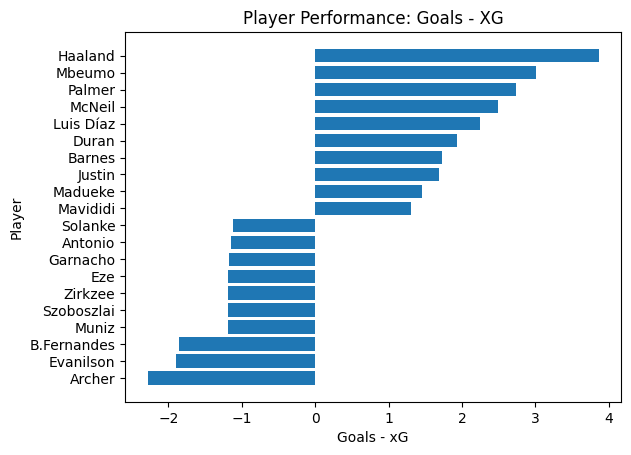

In [48]:
players_to_plot = pd.concat([bottom_10_players,top_10_players])

# Create the bar plot
plt.barh(players_to_plot['web_name'], players_to_plot['Goals-xG'])
plt.xlabel('Goals - xG')
plt.ylabel('Player')
plt.title('Player Performance: Goals - XG')

# Show the plot
plt.show()

As we can see, Kane out-perfomed his xG by a good amount. This was expected as he finished with 29 goals in a Spurs team which underperformed. Also, Havertz was the worst performing player according to this metric. He played in a Chelsea team that struggled for goals all season and he was one of the reasons why.

On the flipside, Barnes and Rodrigo Moreno will be players to watch next season if they are bought by any Premier League clubs as their respectively clubs couldn't avoid the drop even when they outperfomed their xG.

**We can do the same for assists**

In [49]:
slim_elements_df['expected_assists'] = pd.to_numeric(slim_elements_df['expected_assists'],errors='coerce')

slim_elements_df['expected_assists'] = slim_elements_df['expected_assists'].astype(float)

slim_elements_df['assists'] = pd.to_numeric(slim_elements_df['assists'],errors='coerce')

slim_elements_df['assists'] = slim_elements_df['assists'].astype(float)

In [50]:
slim_elements_df['Assists-xA'] = slim_elements_df['assists']-slim_elements_df['expected_assists']

In [51]:
df_sorted_ = slim_elements_df.sort_values('Assists-xA', ascending=False)
df_sorted_

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
211,Sancho,Chelsea,3,1,63,2.5,16,0,4.0,0,2,0.08,0.57,0.65,1.89,Midfielder,0.253968,-0.08,3.43
357,Ndidi,Leicester,3,0,50,4.2,21,0,4.0,0,10,0.24,0.88,1.12,11.26,Midfielder,0.420000,-0.24,3.12
203,N.Jackson,Chelsea,4,15,78,5.1,40,4,3.0,2,6,4.02,0.20,4.22,6.01,Forward,0.512821,-0.02,2.80
13,Saka,Arsenal,3,33,101,4.0,40,1,5.0,3,4,1.69,2.22,3.91,4.92,Midfielder,0.396040,-0.69,2.78
378,Diogo J.,Liverpool,3,9,75,3.3,25,1,3.0,3,1,1.91,0.26,2.17,2.31,Midfielder,0.333333,-0.91,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Gordon,Newcastle,3,10,73,3.8,28,2,0.0,1,6,2.01,1.07,3.08,8.47,Midfielder,0.383562,-0.01,-1.07
407,De Bruyne,Man City,3,5,95,1.9,18,1,1.0,1,3,1.21,2.17,3.38,2.90,Midfielder,0.189474,-0.21,-1.17
390,Mac Allister,Liverpool,3,1,63,2.4,15,0,0.0,4,1,0.19,1.24,1.43,3.96,Midfielder,0.238095,-0.19,-1.24
373,Alexander-Arnold,Liverpool,2,32,71,4.6,33,0,1.0,4,2,0.28,2.33,2.61,3.69,Defender,0.464789,-0.28,-1.33


In [52]:
df_sorted_.dropna()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
211,Sancho,Chelsea,3,1,63,2.5,16,0,4.0,0,2,0.08,0.57,0.65,1.89,Midfielder,0.253968,-0.08,3.43
357,Ndidi,Leicester,3,0,50,4.2,21,0,4.0,0,10,0.24,0.88,1.12,11.26,Midfielder,0.420000,-0.24,3.12
203,N.Jackson,Chelsea,4,15,78,5.1,40,4,3.0,2,6,4.02,0.20,4.22,6.01,Forward,0.512821,-0.02,2.80
13,Saka,Arsenal,3,33,101,4.0,40,1,5.0,3,4,1.69,2.22,3.91,4.92,Midfielder,0.396040,-0.69,2.78
378,Diogo J.,Liverpool,3,9,75,3.3,25,1,3.0,3,1,1.91,0.26,2.17,2.31,Midfielder,0.333333,-0.91,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Gordon,Newcastle,3,10,73,3.8,28,2,0.0,1,6,2.01,1.07,3.08,8.47,Midfielder,0.383562,-0.01,-1.07
407,De Bruyne,Man City,3,5,95,1.9,18,1,1.0,1,3,1.21,2.17,3.38,2.90,Midfielder,0.189474,-0.21,-1.17
390,Mac Allister,Liverpool,3,1,63,2.4,15,0,0.0,4,1,0.19,1.24,1.43,3.96,Midfielder,0.238095,-0.19,-1.24
373,Alexander-Arnold,Liverpool,2,32,71,4.6,33,0,1.0,4,2,0.28,2.33,2.61,3.69,Defender,0.464789,-0.28,-1.33


In [53]:
# Select the top 10 performing players
top_10_players = df_sorted_.head(12)[::-1]

# Select the bottom 10 performing players
bottom_10_players = df_sorted_.tail(12)[::-1]

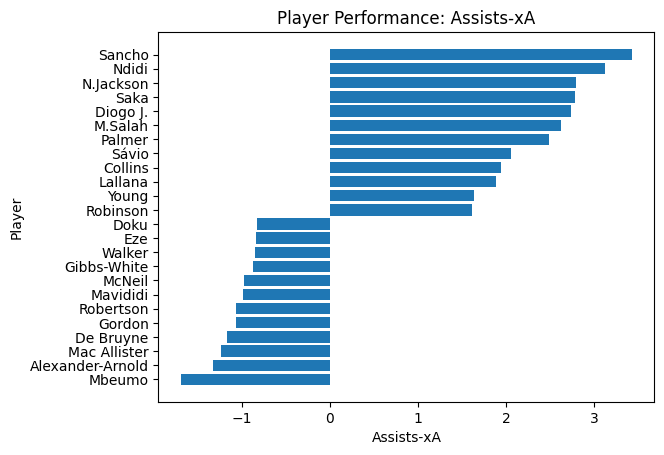

In [54]:
players_to_plot = pd.concat([bottom_10_players,top_10_players])

# Create the bar plot
plt.barh(players_to_plot['web_name'], players_to_plot['Assists-xA'])
plt.xlabel('Assists-xA')
plt.ylabel('Player')
plt.title('Player Performance: Assists-xA')

# Show the plot
plt.show()

**Dominic Solanke!!** Now that is surprising. This stat reminds me of THAT Busquets assist for Messi in the UCL Semi-final. I wonder what the xA for that would have been. \
Haaland is there as well. He has out-performed in both Goals and Assists. Lets see if he can replicate this kind of a season again. 

Bruno Fernandes is there in the underperforming range. He has been one of the most creative players but with only Rashford to score most of the goals, his Assists numbers are down. \
However, Eriksen(teammate of Bruno) has outperfomed his xA, maybe because he takes a lot of set-pieces which have lead to goals thanks to Casemiero(mostly)

In [55]:
df_sorted_[df_sorted_['web_name']=='Haaland']

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
413,Haaland,Man City,4,73,153,4.2,65,10,0.0,1,6,6.14,0.28,6.42,5.21,Forward,0.424837,3.86,-0.28


In [56]:
# !pip install pulp
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

def optimize_team(df):
    # Create a linear optimization problem
    prob = LpProblem("TeamOptimization", LpMaximize)
    
    # Extract player information from the dataframe
    players = df['second_name'].tolist()
    costs = df['now_cost'].tolist()
    points = df['total_points'].tolist()
    positions = df['position'].tolist()
    teams = df['team'].tolist()
    
    # Define the decision variables
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    # Define the objective function (to maximize points)
    prob += lpSum([player_vars[player] * point for player, point in zip(players, points)])
    
    # Add the constraints
    
    # Constraint: Total cost should be less than or equal to 75
    prob += lpSum([player_vars[player] * cost for player, cost in zip(players, costs)]) <= 75, "TotalCost"
    
    # Constraint: Select exactly 11 players
    prob += lpSum([player_vars[player] for player in players]) == 11, "TotalPlayers"
    
    # Constraint: Maximum of 4 defenders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Defender']) == 4, "MaxDefenders"
    
    # Constraint: Maximum of 3 midfielders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Midfielder']) == 3, "MaxMidfielders"
    
    # Constraint: Maximum of 3 attackers
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Attacker']) == 3, "MaxAttackers"
    
    # Constraint: Exactly 1 goalkeeper
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Goalkeeper']) == 1, "Goalkeeper"
    
    # Solve the problem
    prob.solve()
    
    # Extract the optimal team
    optimal_team = [player for player in players if value(player_vars[player]) > 0.5]
    
    # Calculate the total cost and points
    total_cost = sum([cost for player, cost in zip(players, costs) if player in optimal_team])
    total_points = sum([point for player, point in zip(players, points) if player in optimal_team])
    
    # Create a dataframe for the selected players
    selected_players = pd.DataFrame({
        'Player': optimal_team,
        'Cost': [cost for player, cost in zip(players, costs) if player in optimal_team],
        'Points': [point for player, point in zip(players, points) if player in optimal_team]
    })
    
    # Print the total cost, total points, and the selected players
    print(f"Total Cost: {total_cost}")
    print(f"Total Points: {total_points}")
    print("Selected Players:")
    print(selected_players)




In [57]:
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

def optimize_team(df):
    # Create a linear optimization problem
    prob = LpProblem("TeamOptimization", LpMaximize)
    
    # Extract player information from the dataframe
    players = df['second_name'].tolist()
    costs = df['now_cost'].tolist()
    points = df['total_points'].tolist()
    positions = df['position'].tolist()
    teams = df['team'].tolist()
    
    # Define the decision variables
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    # Define the objective function (to maximize points)
    prob += lpSum([player_vars[player] * point for player, point in zip(players, points)])
    
    # Add the constraints
    
    # Constraint: Total cost should be less than or equal to 90
    prob += lpSum([player_vars[player] * cost for player, cost in zip(players, costs)]) <= 85, "TotalCost"
    
    # Constraint: Select exactly 13 players
    prob += lpSum(player_vars) == 11, "TotalPlayers"
    
    # Constraint: Minimum of 4 defenders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'DEF']) == 3, "MinDefenders"
    
    # Constraint: Exactly 3 attackers
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'FWD']) == 3, "Attackers"
    
    # Constraint: Exactly 4 midfielders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'MID']) == 3, "Midfielders"
    
    # Constraint: Exactly 1 goalkeeper
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'GK']) == 1, "Goalkeeper"
    
    # Constraint: No more than 3 players from a single team
    for team in set(teams):
        prob += lpSum([player_vars[player] for player, team_id in zip(players, teams) if team_id == team]) <= 3, f"MaxPlayersPerTeam_{team}"
    
    # Solve the problem
    prob.solve()
    
    # Extract the optimal team
    optimal_team = [player for player in players if value(player_vars[player]) > 0]
    
    # Calculate the total cost and points
    total_cost = sum([cost for player, cost in zip(players, costs) if player in optimal_team])
    total_points = sum([point for player, point in zip(players, points) if player in optimal_team])
    
    # Create a dataframe for the selected players
    selected_players = pd.DataFrame({
        'Player': optimal_team,
        'Cost': [cost for player, cost in zip(players, costs) if player in optimal_team],
        'Points': [point for player, point in zip(players, points) if player in optimal_team]
    })
    
    # Print the total cost, total points, and the selected players
    print(f"Total Cost: {total_cost}")
    print(f"Total Points: {total_points}")
    print("Selected Players:")
    print(selected_players)

In [58]:
# df.shape

In [59]:
def select_team(expected_scores, prices, positions, clubs, total_budget=100, sub_factor=0.2):
    num_players = 385
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]


    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + sub_decisions[i]*sub_factor) * expected_scores[i]
                 for i in range(num_players)), "Objective"

    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost

    # position constraints
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2

    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) <= 5
    # 5 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5

    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5

    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) <= 3
    # 3 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3

    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players

    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    model.solve()
    print("Total expected score = {}".format(model.objective.value()))

    return decisions, captain_decisions, sub_decisions

In [60]:
import pulp
import pandas as pd
import numpy as np

def integrate_team_optimization(df, total_budget=100, sub_factor=0.2):
    num_players = len(df)
    
    # Create decision variables
    decisions = [
        pulp.LpVariable(f"x{i}", lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable(f"y{i}", lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable(f"z{i}", lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    
    # Create a linear optimization problem
    model = pulp.LpProblem("ConstrainedValueMaximization", pulp.LpMaximize)
    
    # Extract player information from the dataframe
    expected_scores = df['total_points'].tolist()
    prices = df['now_cost'].tolist()
    positions = df['position'].tolist()
    clubs = df['team'].tolist()
    
    # Objective function: maximize expected scores with captain, main team, and subs
    model += sum((captain_decisions[i] + decisions[i] + sub_decisions[i] * sub_factor) * expected_scores[i]
                 for i in range(num_players)), "Objective"
    
    # Cost constraint: total cost should be less than or equal to the budget
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget
    
    # Position constraints
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1) == 1
    # 2 total goalkeepers (including subs)
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2
    
    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) <= 5
    # 5 total defenders (including subs)
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5
    
    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) <= 5
    # 5 total midfielders (including subs)
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5
    
    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) <= 3
    # 3 total attackers (including subs)
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3
    
    # Club constraint: no more than 3 players from the same club (including subs)
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3
    
    # Additional constraints
    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # exactly 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    # Solve the problem
    model.solve()
    print("Total expected score = {}".format(pulp.value(model.objective)))

    # Extract results
    selected_players = [i for i in range(num_players) if pulp.value(decisions[i]) > 0]
    captain = [i for i in range(num_players) if pulp.value(captain_decisions[i]) > 0][0]
    substitutes = [i for i in range(num_players) if pulp.value(sub_decisions[i]) > 0]

    selected_df = df.iloc[selected_players].copy()
    selected_df['Role'] = 'Starting'
    selected_df.loc[captain, 'Role'] = 'Captain'
    selected_df = selected_df.append(df.iloc[substitutes].assign(Role='Substitute'))

    total_cost = sum(prices[i] for i in selected_players + substitutes)
    total_points = sum(expected_scores[i] for i in selected_players + substitutes)
    
    print(f"Total Cost: {total_cost}")
    print(f"Total Points: {total_points}")
    print("Selected Team:")
    print(selected_df[['second_name', 'now_cost', 'total_points', 'position', 'team', 'Role']])
    
    return selected_df, total_cost, total_points


In [61]:
df = slim_elements_df
expected_scores = df['total_points']
prices = df['now_cost']/10
positions = df['position']
teams = df['team']
names = df['web_name']

In [62]:
def convert_to_numerical_category(obj_list):
    # Create a dictionary to store the mapping of objects to numerical categories
    category_mapping = {}
    numerical_category = 0
    
    # Initialize an empty list to store the numerical categories
    numerical_categories = []
    
    # Iterate over the objects in the list
    for obj in obj_list:
        # Check if the object is already assigned a numerical category
        if obj in category_mapping:
            # If so, append the existing numerical category to the list
            numerical_categories.append(category_mapping[obj])
        else:
            # If not, assign a new numerical category and update the mapping
            category_mapping[obj] = numerical_category
            numerical_categories.append(numerical_category)
            numerical_category += 1
    
    return numerical_categories


In [63]:
df['positions_'] = convert_to_numerical_category(positions)
df['clubs'] = convert_to_numerical_category(teams)

In [64]:
positions_ = df['positions_']
clubs = df['clubs']

In [65]:
import pandas as pd
import pulp
df = pd.read_csv(
    # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/players_raw.csv"
    "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2024-25/players_raw.csv"
)
expected_scores = df["total_points"] / 38  # penalises players who played fewer games
prices = df["now_cost"] / 10
positions = df["element_type"]
clubs = df["team_code"]
# so we can read the results
names = df["first_name"] + " " + df["second_name"]

decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values)
player_indices = []

print()
print("First Team:")
for i in range(len(decisions)):
    if decisions[i].value() == 1:
        print("{}{}".format(names[i], "*" if captain_decisions[i].value() == 1 else ""))
        player_indices.append(i)
print()
print("Subs:")
for i in range(len(sub_decisions)):
    if sub_decisions[i].value() == 1:
        print(names[i])
        player_indices.append(i)

D:\FPL\myenv\Lib\site-packages\pulp\pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 10.631578947368418

First Team:
Gabriel dos Santos Magalhães*
David Raya Martin
Bukayo Saka
Bryan Mbeumo
Yoane Wissa
Joël Veltman
Danny Welbeck
Nicolas Jackson
Cole Palmer
Emile Smith Rowe
Trent Alexander-Arnold

Subs:
Jan Paul van Hecke
Robert Sánchez
Dwight McNeil
Antonee Robinson


In [66]:
# import pandas as pd
# import pulp
# files = [ 
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/players_raw.csv",
#     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/players_raw.csv"
    
# ]
# dfs = [pd.read_csv(file) for file in files]
# combined_df = pd.concat(dfs, ignore_index=True)
# # df = pd.read_csv(
# #     # "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/players_raw.csv"
# #     "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/players_raw.csv"
# # )
# df= combined_df
# # print(df)
# expected_scores = df["total_points"] / 38  # penalises players who played fewer games
# prices = df["now_cost"] / 10
# positions = df["element_type"]
# clubs = df["team_code"]
# # so we can read the results
# names = df["first_name"] + " " + df["second_name"]

# decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values)
# player_indices = []

# print()
# print("First Team:")
# for i in range(len(decisions)):
#     if decisions[i].value() == 1:
#         print("{}{}".format(names[i], "*" if captain_decisions[i].value() == 1 else ""))
#         player_indices.append(i)
# print()
# print("Subs:")
# for i in range(len(sub_decisions)):
#     if sub_decisions[i].value() == 1:
#         print(names[i])
#         player_indices.append(i)